# PyTideAnalyzer example

In this notebook we show a small example of how to use the ```PyTideAnalyzer``` class. This is a thin wrapper class around a few pytide functions to make it easy to use pytide without shooting yourself in the foot, especially regarding datetimes and timezones.

In [1]:
import datetime
import pytz

import os
import time

import netCDF4

import pytide

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pytide.helpers import show_tides, datetime_range

In [2]:
# the PyTideAnalyzer class will only accept to be used if the whole Python interpreter
# in UTC timezone. This is to avoid some possible issues around timezone leading to some
# time shifts in case the interpreter is in another timezone.

os.environ["TZ"] = "UTC"
time.tzset()

build wave table
compute nodal modulations
perform harmonic analysis
prefer using datetime.timezone.utc to pytz.utc
prefer using datetime.timezone.utc to pytz.utc
perform predictions


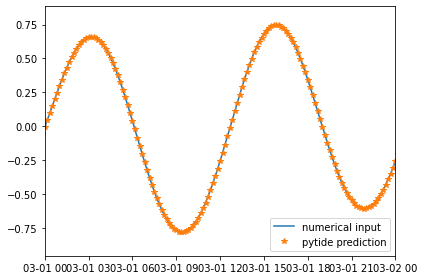

In [3]:
# the fit against some simulation data should be close to perfect

path_to_data = os.path.join(os.getcwd(),
                            "..", "tests", "dataset",
                            "fes_tide_time_series.nc")

with netCDF4.Dataset(path_to_data) as dataset:
    time_input = dataset['time'][:] * 1e-6    # microseconds to epoch (seconds)
    observations = dataset['ocean'][:]             # TODO: report

list_utc_datetimes = [pytz.utc.localize(datetime.datetime.fromtimestamp(crrt_timestamp)) for
                        crrt_timestamp in time_input]

pytide_analyzer = pytide.PyTideAnalyzer(verbose=1)

# using display=True here would illustrate the fit
pytide_analyzer.fit_tide_data(list_utc_datetimes, observations, display=False)

datetime_prediction = \
    list(datetime_range(list_utc_datetimes[0],
                        list_utc_datetimes[-1],
                        datetime.timedelta(minutes=10)))

prediction = pytide_analyzer.predict_tide(datetime_prediction)

plt.figure()
plt.plot(list_utc_datetimes, observations, label="numerical input")
plt.plot(datetime_prediction, prediction, "*", label="pytide prediction")
plt.legend()

# put some restrictive limites otherwise nothing is visible with inline figures
if True:
    plt.xlim([mdates.date2num(datetime.datetime(2018, 3, 1, 0, 0)),
             mdates.date2num(datetime.datetime(2018, 3, 2, 0, 0))])

plt.tight_layout()
plt.show()

build wave table
compute nodal modulations
perform harmonic analysis
perform predictions
RMSE pytide vs obs BGO middle dataset: 13.0535826577466
RMSE official prediction vs obs BGO middle dataset: 13.413595199584961
RMSE pytide vs official predictions BGO middle dataset: 3.209902686984082


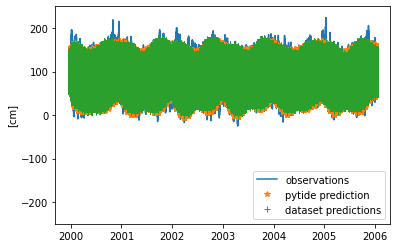

In [4]:
# fit to real-world data works fine, though the weather effect is of course not included

path_to_data = os.path.join(os.getcwd(),
                            "..", "tests", "dataset",
                            "dataset_observation_middle.nc4")

with netCDF4.Dataset(path_to_data) as dataset:
    time_input = dataset['timestamps'][:]
    observations = dataset['observations'][:]
    official_predictions = dataset['predictions'][:]

list_utc_datetimes = [pytz.utc.localize(datetime.datetime.fromtimestamp(crrt_timestamp)) for
                        crrt_timestamp in time_input]

pytide_analyzer = pytide.PyTideAnalyzer(verbose=1)

# using display=True here would illustrate the fit, but we do it in the next lines anyways
pytide_analyzer.fit_tide_data(list_utc_datetimes, observations, display=False)

prediction = pytide_analyzer.predict_tide(list_utc_datetimes)

show_tides(list_utc_datetimes, observations, prediction, official_predictions,
            explanation="BGO middle dataset", max_amplitude=250)

found 5014 invalid values out of 262945; clean now!
build wave table
compute nodal modulations
perform harmonic analysis
perform predictions


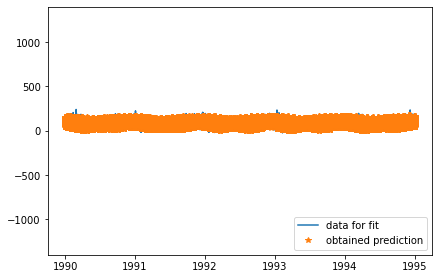

perform predictions


/home/jrmet/.local/lib/python3.8/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


RMSE pytide vs obs BGO dataset with invalid: 1.3808919677674078e+36
RMSE official prediction vs obs BGO dataset with invalid: 14.963165218466383
RMSE pytide vs official predictions BGO dataset with invalid: 3.2957379020021493


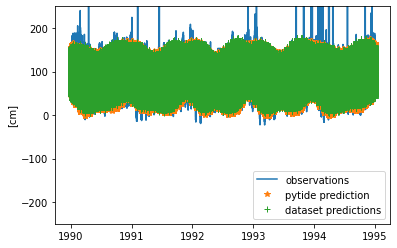

In [5]:
# the analyzer class can also take care of missing data

path_to_data = os.path.join(os.getcwd(),
                            "..", "tests", "dataset",
                            "dataset_observations_contains_invalid.nc4")

with netCDF4.Dataset(path_to_data) as dataset:
    time_input = dataset['timestamps'][:]
    observations = dataset['observations'][:]
    official_predictions = dataset['predictions'][:]

list_utc_datetimes = [pytz.utc.localize(datetime.datetime.fromtimestamp(crrt_timestamp)) for
                        crrt_timestamp in time_input]

pytide_analyzer = pytide.PyTideAnalyzer(verbose=1)

# using display=True here would illustrate the fit
pytide_analyzer.fit_tide_data(list_utc_datetimes, observations, display=True, clean_signals=True)

prediction = pytide_analyzer.predict_tide(list_utc_datetimes)

show_tides(list_utc_datetimes, observations, prediction, official_predictions,
            explanation="BGO dataset with invalid", max_amplitude=250)